In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def initialize(size, separation, cap_length): 
    '''
    All of these values are in units of "grid points" 
    I'm lazy, so if one variable is even make them all even and if one is odd make them all odd please :)

    This code builds the initial array with the capacitor in the middle separated by separation
    '''
    pot = np.zeros((size,size))
    #pot[row][column]=value         reminder of convention for Python arrays
    
    parity = size % 2
    if not (separation % 2 == parity and cap_length % 2 == parity):
        raise ValueError("All inputs must be either even or odd for symmetry.")  #Gives an error if you didn't follow my damn instructions
        

    half_cap = cap_length//2
    dist_from_top = (size//2) - half_cap
    dist_from_side = (size//2) - separation//2

    for i in range(size):                #Sets up the even capacitor in it's location
        for j in range(size):
            if j == dist_from_side-1 and dist_from_top <= i <= dist_from_top + cap_length-1:
                pot[i][j] = 1
            elif j == (dist_from_side +separation) and dist_from_top <= i <= dist_from_top + cap_length-1:
                pot[i][j] = -1
                
    return(pot, size, separation, cap_length)


In [56]:
def pot_calc(pot, size, separation, cap_length):
    '''
    creates a potential field by calculating the average from all nearby potentials
    not changing the boundaries or the capacitor potential
    '''
    pot_new = pot.copy()              #Create a duplicate of pot
    con_val = 0                   #creating convergence variable

    half_cap = cap_length//2
    dist_from_top = (size//2) - half_cap
    dist_from_side = (size//2) - separation//2

                              # potential is zero at the perimeter
    for i in range(1,size-1):                  # potential is zero at the perimeter
                            # potential is zero at the perimeter
        for j in range(1,size-1):                   # potential is zero at the perimeter

        # below is making sure capacitor value isn't changed
            if j == dist_from_side-1 and dist_from_top <= i <= dist_from_top + cap_length-1:
                pot[i][j] = 1

            elif j == (dist_from_side + separation) and dist_from_top <= i <= dist_from_top + cap_length-1: 
                pot[i][j] = -1     

            else:
                pot_new[i][j]=(pot[i][j-1]+pot[i][j+1]+pot[i-1][j]+pot[i+1][j])/4   # actual calculation of new potential
                con_val = con_val + abs(pot_new[i][j]-pot[i][j])                        # adding up contributions to convergence variable


            
    np.copyto(pot,pot_new)

    return(pot,con_val)

In [57]:
def converge(pot, size, separation, cap_length):
    con_val = 1
    run = 0
    while con_val > (10**(-5))*((size - 2)**2):
        pot, con_val = pot_calc(pot, size, separation, cap_length)
        run += 1
    print(f'Converged on iteration {run} with value {con_val}')
    return(pot)

In [58]:
def calculate_e_field(pot, size, length):     # Here you can define an actual length unit I guess ¯\\(ツ)/¯ for the box size
    '''
    look, I'm not gonna lie, I copied you e-field calc
    size is gridpoints, length gives the length of the box which is evenly split up throughout the gridpoints of the box
    '''
    x = np.arange(-length/2, length/2, length/size)
    y = np.arange(-length/2, length/2, length/size)
    
    e_field_x = np.zeros((size,size))          #E-Field is a vector Field, need x & Y component
    e_field_y = np.zeros((size,size))
                                    # since E-Field is derivative of potential, sides of array won't have E-Field
    for i in range(1,size-1):

        for j in range(1,size-1):

            e_field_x[i][j]=-(pot[i][j+1]-pot[i][j-1])/(2*(x[i+1]-x[i]))    # Definition of E-Field as the gradient of potential in respective direction
            e_field_y[i][j]=-(pot[i+1][j]-pot[i-1][j])/(2*(y[i+1]-y[i]))    # Definition of E-Field as the gradient of potential in respective direction


    return e_field_x, e_field_y, x, y

In [59]:
pot, size, separation, cap_length = initialize(51, 11, 41)
pot = converge(pot, size, separation, cap_length)
E_x, E_y, x, y = calculate_e_field(pot, size, 100)

Converged on iteration 660 with value 0.02387284962505124


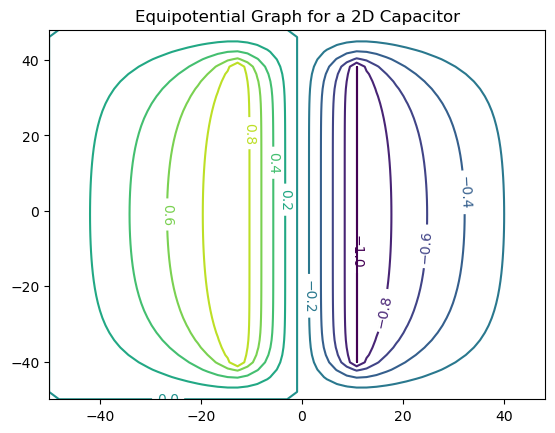

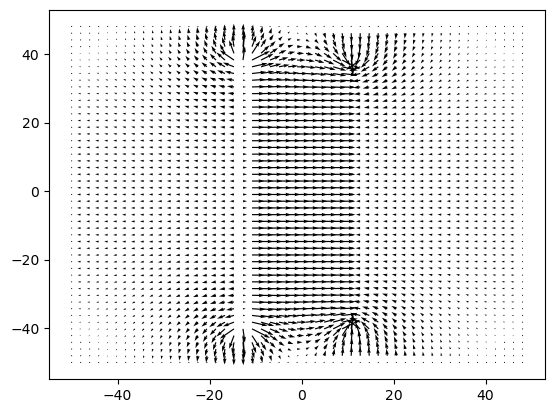

In [60]:
poten = plt.contour(x, y, pot,levels = 10)
plt.title('Equipotential Graph for a 2D Capacitor')
plt.clabel(poten)
#plt.savefig('Equipotential Graph for a 2D Capacitor')
plt.show()
plt.quiver(x,y,E_x,E_y)
plt.show()

In [68]:
#separation 3
pot1, size1, separation1, cap_length1 = initialize(51, 3, 23)
pot1 = converge(pot1, size1, separation1, cap_length1)
E_x1, E_y1, x1, y1 = calculate_e_field(pot1, size1, 51)

E_Mag_Center1 = []
E_Mag_Vert1 = []
for j in range(size1):
    E_Mag_Center1.append(
        ((E_x1[size1//2+1][j])**2 + (E_y1[size1//2+1][j])**2)**0.5
    )
    E_Mag_Vert1.append(
        ((E_x1[j][size1//2 +1])**2 + (E_y1[j][size1//2 + 1])**2)**0.5
    )

#separation 5
pot2, size2, separation2, cap_length2 = initialize(51, 5, 23)
pot2 = converge(pot2, size2, separation2, cap_length2)
E_x2, E_y2, x2, y2 = calculate_e_field(pot2, size2, 51)

E_Mag_Vert2 = []
E_Mag_Center2 = []
for j in range(size2):
    E_Mag_Center2.append(
        ((E_x2[size2//2+1][j])**2 + (E_y2[size2//2+1][j])**2)**0.5
    )
    E_Mag_Vert2.append(
        ((E_x2[j][size2//2 +1])**2 + (E_y2[j][size2//2 + 1])**2)**0.5
    )
    
#separation 9
pot3, size3, separation3, cap_length3 = initialize(51, 9, 23)
pot3 = converge(pot3, size3, separation3, cap_length3)
E_x3, E_y3, x3, y3 = calculate_e_field(pot3, size3, 51)

E_Mag_Vert3 = []
E_Mag_Center3 = []
for j in range(size3):
    E_Mag_Center3.append(
        ((E_x3[size3//2+1][j])**2 + (E_y3[size3//2+1][j])**2)**0.5
    )
    E_Mag_Vert3.append(
        ((E_x3[j][size3//2 +1])**2 + (E_y3[j][size3//2 + 1])**2)**0.5
    )
    
#separation 15
pot4, size4, separation4, cap_length4 = initialize(51, 21, 23)
pot4 = converge(pot4, size4, separation4, cap_length4)
E_x4, E_y4, x4, y4 = calculate_e_field(pot4, size4, 51)

E_Mag_Vert4 = []
E_Mag_Center4 = []
for j in range(size4):
    E_Mag_Center4.append(
        ((E_x4[size4//2+1][j])**2 + (E_y4[size4//2+1][j])**2)**0.5
    )
    E_Mag_Vert4.append(
        ((E_x4[j][size4//2 +1])**2 + (E_y4[j][size4//2 + 1])**2)**0.5
    )

Converged on iteration 846 with value 0.023984161993088757
Converged on iteration 805 with value 0.024009821511350678
Converged on iteration 718 with value 0.023890639635757636
Converged on iteration 481 with value 0.02382886029124661


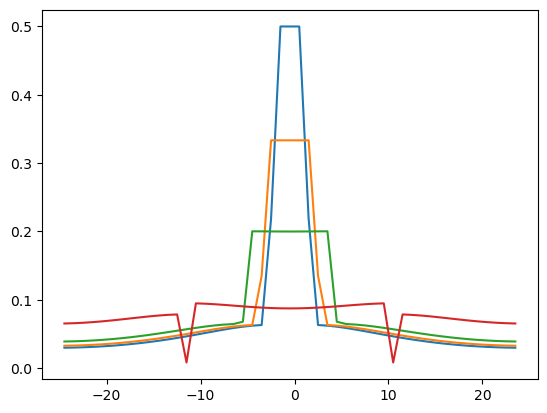

In [91]:
plt.plot(x1[1:-1], E_Mag_Center1[1:-1])
plt.plot(x2[1:-1], E_Mag_Center2[1:-1])
plt.plot(x3[1:-1], E_Mag_Center3[1:-1])
plt.plot(x4[1:-1], E_Mag_Center4[1:-1])

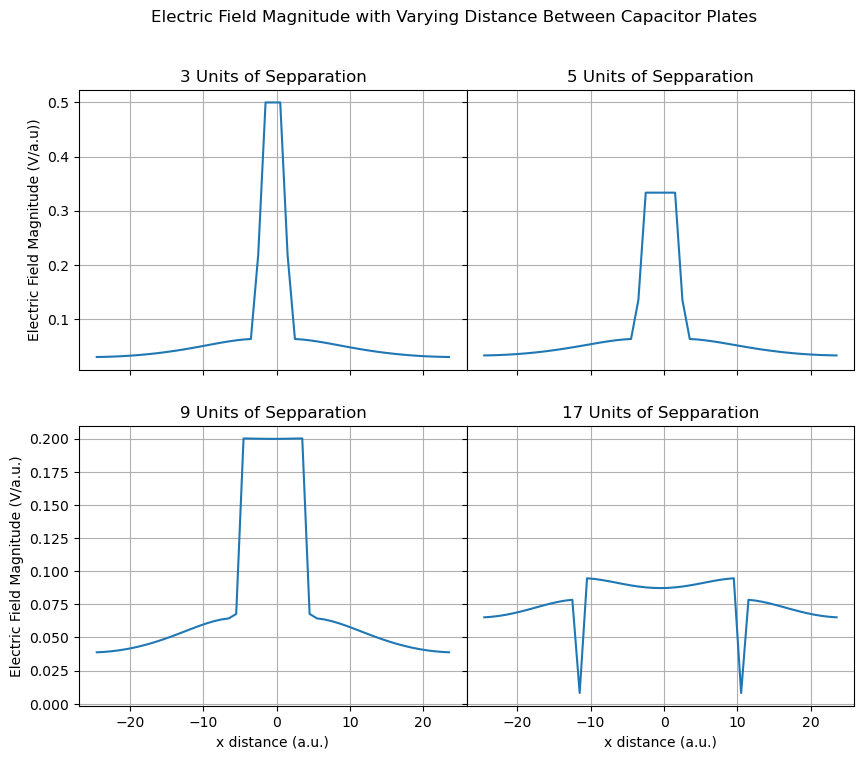

In [62]:

# Create 2x2 subplots with shared axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex='col', sharey='row')

# First subplot (top-left)
axs[0, 0].plot(x1[1:-1], E_Mag_Center1[1:-1])
axs[0, 0].set_title('3 Units of Sepparation')
axs[0, 0].set_ylabel('Electric Field Magnitude (V/a.u))')
axs[0, 0].grid(True)

# Second subplot (top-right)
axs[0, 1].plot(x2[1:-1], E_Mag_Center2[1:-1])
axs[0, 1].set_title('5 Units of Sepparation')
axs[0, 1].grid(True)

# Third subplot (bottom-left)
axs[1, 0].plot(x3[1:-1], E_Mag_Center3[1:-1])
axs[1, 0].set_title('9 Units of Sepparation')
axs[1, 0].set_xlabel('x distance (a.u.)')
axs[1, 0].set_ylabel('Electric Field Magnitude (V/a.u.)')
axs[1, 0].grid(True)

# Fourth subplot (bottom-right)
axs[1, 1].plot(x4[1:-1], E_Mag_Center4[1:-1])
axs[1, 1].set_title('17 Units of Sepparation')
axs[1, 1].set_xlabel('x distance (a.u.)')
axs[1, 1].grid(True)

plt.suptitle('Electric Field Magnitude with Varying Distance Between Capacitor Plates', fontsize=12)
plt.subplots_adjust(wspace=0, hspace=0.2)
#plt.savefig('EField by sepparation x')
plt.show()


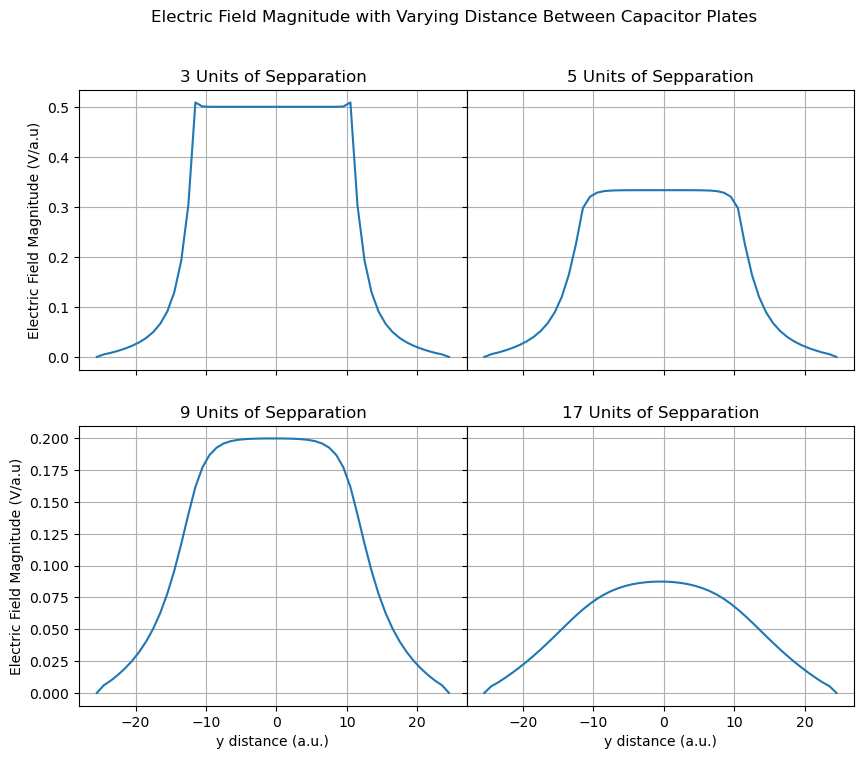

In [63]:

# Create 2x2 subplots with shared axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex='col', sharey='row')

# First subplot (top-left)
axs[0,0].plot(y1,E_Mag_Vert1)
axs[0, 0].set_title('3 Units of Sepparation')
axs[0, 0].set_ylabel('Electric Field Magnitude (V/a.u)')
axs[0, 0].grid(True)

# Second subplot (top-right)
axs[0, 1].plot(y2,E_Mag_Vert2)
axs[0, 1].set_title('5 Units of Sepparation')
axs[0, 1].grid(True)

# Third subplot (bottom-left)
axs[1, 0].plot(y3,E_Mag_Vert3)
axs[1, 0].set_title('9 Units of Sepparation')
axs[1, 0].set_xlabel('y distance (a.u.)')
axs[1, 0].set_ylabel('Electric Field Magnitude (V/a.u)')
axs[1, 0].grid(True)

# Fourth subplot (bottom-right)
axs[1, 1].plot(y4,E_Mag_Vert4)
axs[1, 1].set_title('17 Units of Sepparation')
axs[1, 1].set_xlabel('y distance (a.u.)')
axs[1, 1].grid(True)

plt.suptitle('Electric Field Magnitude with Varying Distance Between Capacitor Plates', fontsize=12)
plt.subplots_adjust(wspace=0, hspace=0.2)
#plt.savefig('EField by sepparation y')
plt.show()


In [64]:
#cap length = 5
pot1, size1, separation1, cap_length1 = initialize(51, 13, 5)
pot1 = converge(pot1, size1, separation1, cap_length1)
E_x1, E_y1, x1, y1 = calculate_e_field(pot1, size1, 51)

E_Mag_Center1 = []
E_Mag_Vert1 = []
for j in range(size1):
    E_Mag_Center1.append(
        ((E_x1[size1//2+1][j])**2 + (E_y1[size1//2+1][j])**2)**0.5
    )
    E_Mag_Vert1.append(
        ((E_x1[j][size1//2 +1])**2 + (E_y1[j][size1//2 + 1])**2)**0.5
    )

#cap lenght = 15
pot2, size2, separation2, cap_length2 = initialize(51, 13, 15)
pot2 = converge(pot2, size2, separation2, cap_length2)
E_x2, E_y2, x2, y2 = calculate_e_field(pot2, size2, 51)

E_Mag_Vert2 = []
E_Mag_Center2 = []
for j in range(size2):
    E_Mag_Center2.append(
        ((E_x2[size2//2+1][j])**2 + (E_y2[size2//2+1][j])**2)**0.5
    )
    E_Mag_Vert2.append(
        ((E_x2[j][size2//2 +1])**2 + (E_y2[j][size2//2 + 1])**2)**0.5
    )
    
#cap length = 21
pot3, size3, separation3, cap_length3 = initialize(51, 13, 21)
pot3 = converge(pot3, size3, separation3, cap_length3)
E_x3, E_y3, x3, y3 = calculate_e_field(pot3, size3, 51)

E_Mag_Vert3 = []
E_Mag_Center3 = []
for j in range(size3):
    E_Mag_Center3.append(
        ((E_x3[size3//2+1][j])**2 + (E_y3[size3//2+1][j])**2)**0.5
    )
    E_Mag_Vert3.append(
        ((E_x3[j][size3//2 +1])**2 + (E_y3[j][size3//2 + 1])**2)**0.5
    )

#cap length = 51
pot4, size4, separation4, cap_length4 = initialize(51, 13, 51)
pot4 = converge(pot4, size4, separation4, cap_length4)
E_x4, E_y4, x4, y4 = calculate_e_field(pot4, size4, 51)

E_Mag_Vert4 = []
E_Mag_Center4 = []
for j in range(size4):
    E_Mag_Center4.append(
        ((E_x4[size4//2+1][j])**2 + (E_y4[size4//2+1][j])**2)**0.5
    )
    E_Mag_Vert4.append(
        ((E_x4[j][size4//2 +1])**2 + (E_y4[j][size4//2 + 1])**2)**0.5
    )

Converged on iteration 680 with value 0.02399498070375701
Converged on iteration 658 with value 0.023832882273276016
Converged on iteration 635 with value 0.023979075576777066
Converged on iteration 608 with value 0.02387680270902035


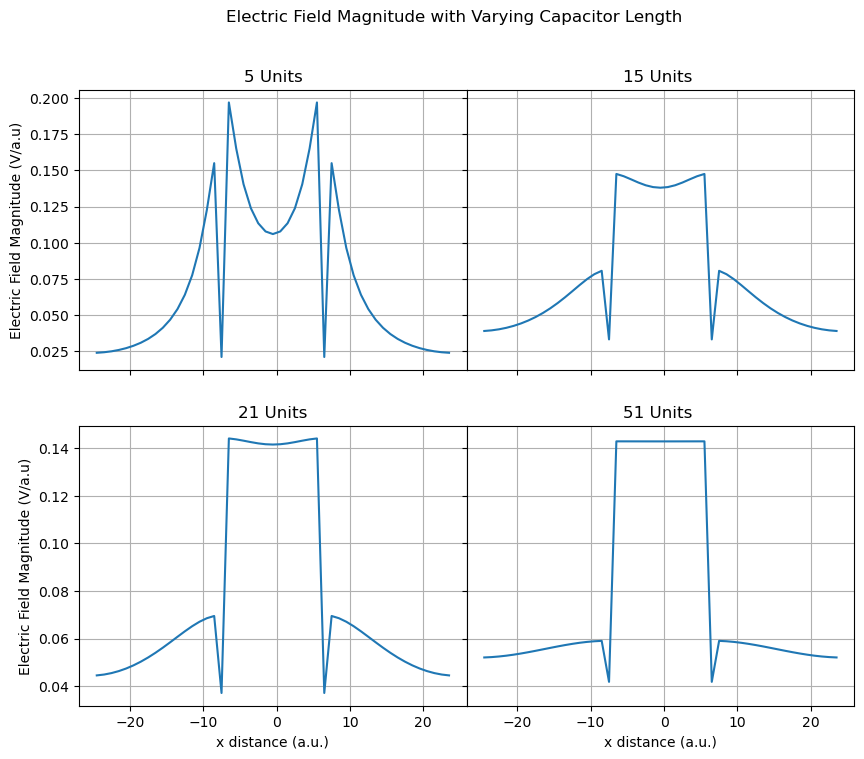

In [65]:

# Create 2x2 subplots with shared axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex='col', sharey='row')

# First subplot (top-left)
axs[0, 0].plot(x1[1:-1], E_Mag_Center1[1:-1])
axs[0, 0].set_title('5 Units')
axs[0, 0].set_ylabel('Electric Field Magnitude (V/a.u)')
axs[0, 0].grid(True)

# Second subplot (top-right)
axs[0, 1].plot(x2[1:-1], E_Mag_Center2[1:-1])
axs[0, 1].set_title('15 Units ')
axs[0, 1].grid(True)

# Third subplot (bottom-left)
axs[1, 0].plot(x3[1:-1], E_Mag_Center3[1:-1])
axs[1, 0].set_title('21 Units')
axs[1, 0].set_xlabel('x distance (a.u.)')
axs[1, 0].set_ylabel('Electric Field Magnitude (V/a.u)')
axs[1, 0].grid(True)

# Fourth subplot (bottom-right)
axs[1, 1].plot(x4[1:-1], E_Mag_Center4[1:-1])
axs[1, 1].set_title('51 Units ')
axs[1, 1].set_xlabel('x distance (a.u.)')
axs[1, 1].grid(True)

plt.suptitle('Electric Field Magnitude with Varying Capacitor Length', fontsize=12)
plt.subplots_adjust(wspace=0, hspace=0.2)
#plt.savefig('EField by length x')
plt.show()


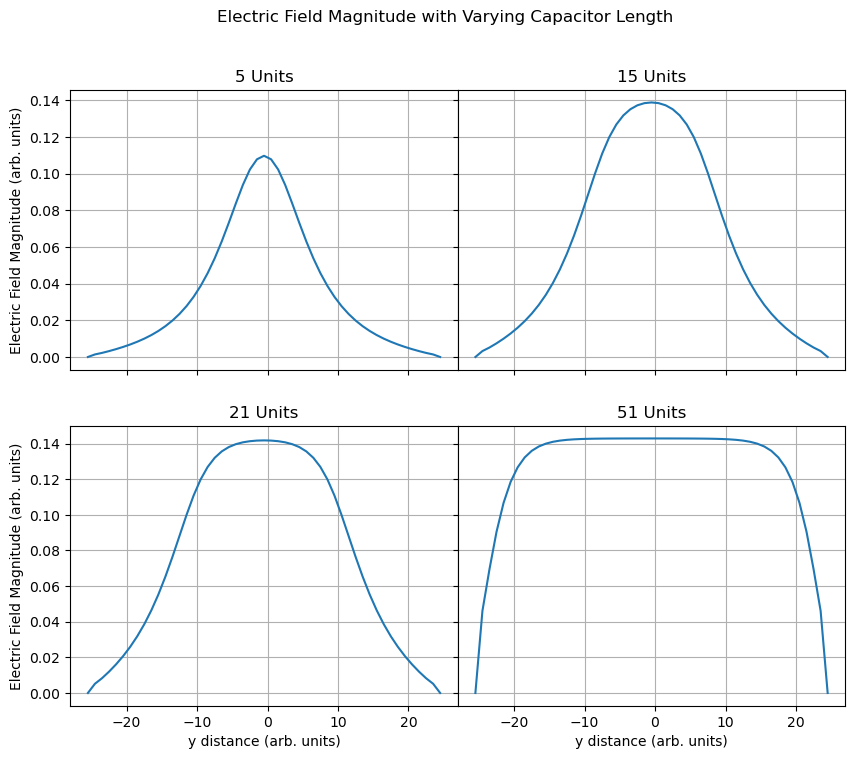

In [66]:

# Create 2x2 subplots with shared axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex='col', sharey='row')

# First subplot (top-left)
axs[0,0].plot(y1,E_Mag_Vert1)
axs[0, 0].set_title('5 Units')
axs[0, 0].set_ylabel('Electric Field Magnitude (arb. units)')
axs[0, 0].grid(True)

# Second subplot (top-right)
axs[0, 1].plot(y2,E_Mag_Vert2)
axs[0, 1].set_title('15 Units')
axs[0, 1].grid(True)

# Third subplot (bottom-left)
axs[1, 0].plot(y3,E_Mag_Vert3)
axs[1, 0].set_title('21 Units')
axs[1, 0].set_xlabel('y distance (arb. units)')
axs[1, 0].set_ylabel('Electric Field Magnitude (arb. units)')
axs[1, 0].grid(True)

# Fourth subplot (bottom-right)
axs[1, 1].plot(y4,E_Mag_Vert4)
axs[1, 1].set_title('51 Units')
axs[1, 1].set_xlabel('y distance (arb. units)')
axs[1, 1].grid(True)

plt.suptitle('Electric Field Magnitude with Varying Capacitor Length', fontsize=12)
plt.subplots_adjust(wspace=0, hspace=0.2)
#plt.savefig('EField by length y')
plt.show()
